In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


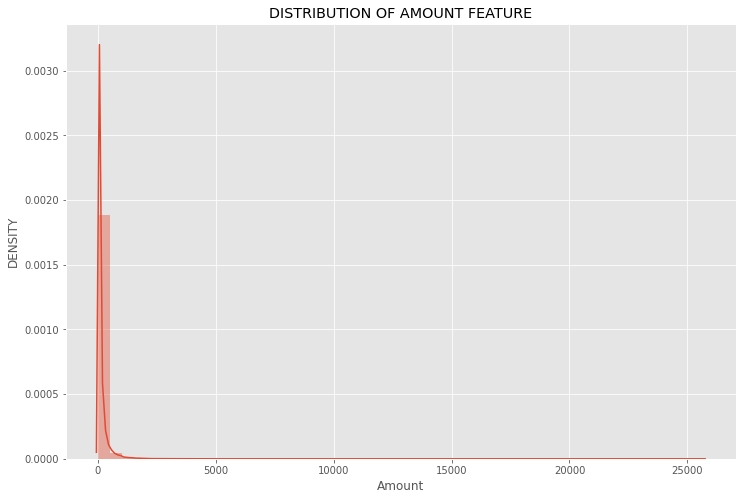

In [ ]:
plt.figure(figsize=(12,8))
plt.title('DISTRIBUTION OF AMOUNT FEATURE')
plt.xlabel("AMOUNT")
plt.ylabel("DENSITY")
sns.distplot(data.Amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


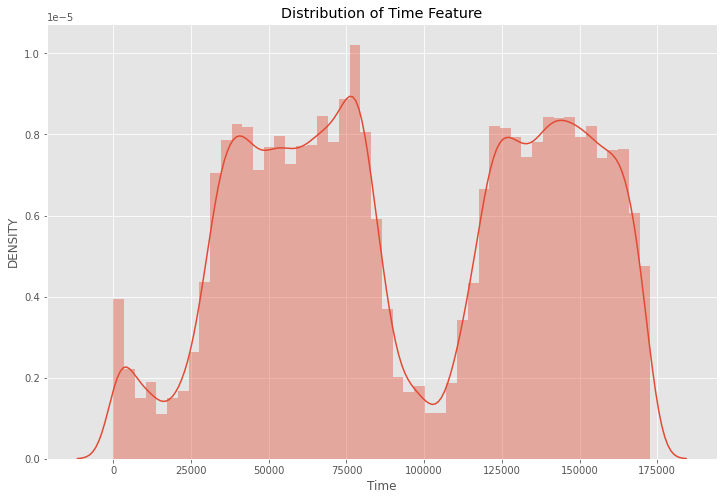

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Time Feature')
plt.xlabel("TIME")
plt.ylabel("DENSITY")
sns.distplot(data.Time)

In [ ]:
COUNTS = data.Class.value_counts()
COUNTS
Non_Fradulent = COUNTS[0]
Fradulent = COUNTS[1]

In [ ]:
percent_non_fraud = (Non_Fradulent/(Non_Fradulent+Fradulent))*100
print('The percentage of Non Fradualent cases in the dataset are ({:.3f}%").'.format(percent_non_fraud))
percent_fraud = (Fradulent/(Non_Fradulent+Fradulent))*100
print('The percentage of Fradualent cases in the dataset are ({:.3f}%").'.format(percent_fraud))

The percentage of Non Fradualent cases in the dataset are (99.827%").
The percentage of Fradualent cases in the dataset are (0.173%").


Text(0, 0.5, 'Count of Transactions')

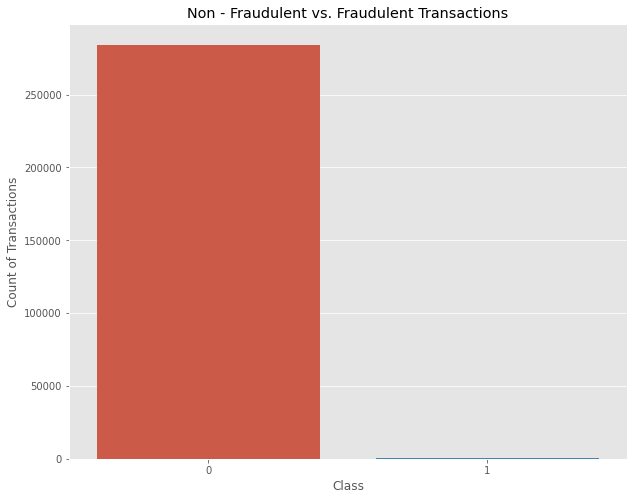

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=COUNTS.index, y=COUNTS)
plt.title('Non - Fraudulent vs. Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count of Transactions')

In [ ]:
skew_ = data.skew()
skew_

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_time = StandardScaler()
scaler_amount = StandardScaler()

In [ ]:
SCALED_TIME = scaler_time.fit_transform(data[['Time']])
LIST1 = [item for sublist in SCALED_TIME.tolist() for item in sublist]
SCALED_TIME = pd.Series(LIST1)

In [ ]:
SCALED_AMOUNT = scaler_amount.fit_transform(data[['Amount']])
LIST2 = [item for sublist in SCALED_AMOUNT.tolist() for item in sublist]
SCALED_AMOUNT = pd.Series(LIST2)

In [ ]:
data = pd.concat([data, SCALED_AMOUNT.rename('SCALED_AMOUNT'), SCALED_TIME.rename('SCALED_TIME')], axis=1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,SCALED_AMOUNT,SCALED_TIME
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.350151,1.641931
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.254117,1.641952
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.081839,1.641974
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.313249,1.641974


In [ ]:
data.drop(['Amount', 'Time'], axis=1, inplace=True)

In [ ]:
split = np.random.rand(len(data)) < 0.95
Train_data = data[split]
Test_data = data[~split]

In [ ]:
Train_data.reset_index(drop=True, inplace=True)
Test_data.reset_index(drop=True, inplace=True)

In [ ]:
NumberofFrauds = Train_data.Class.value_counts()[1]
print('The total number of fraudulent transactions in the train data are : {}'.format(NumberofFrauds))

The total number of fraudulent transactions in the train data are : 466


In [ ]:
Non_Fraud = Train_data[Train_data['Class'] == 0]
print(Non_Fraud)
Fraud = Train_data[Train_data['Class'] == 1]
print(Fraud)

               V1         V2        V3  ...  Class  SCALED_AMOUNT  SCALED_TIME
0       -1.359807  -0.072781  2.536347  ...      0       0.244964    -1.996583
1        1.191857   0.266151  0.166480  ...      0      -0.342475    -1.996583
2       -1.358354  -1.340163  1.773209  ...      0       1.160686    -1.996562
3       -0.966272  -0.185226  1.792993  ...      0       0.140534    -1.996562
4       -1.158233   0.877737  1.548718  ...      0      -0.073403    -1.996541
...           ...        ...       ...  ...    ...            ...          ...
270723 -11.881118  10.071785 -9.834783  ...      0      -0.350151     1.641931
270724  -0.732789  -0.055080  2.035030  ...      0      -0.254117     1.641952
270725   1.919565  -0.301254 -3.249640  ...      0      -0.081839     1.641974
270726  -0.240440   0.530483  0.702510  ...      0      -0.313249     1.641974
270727  -0.533413  -0.189733  0.703337  ...      0       0.514355     1.642058

[270262 rows x 31 columns]
              V1        

In [ ]:
selected_cases = Non_Fraud.sample(NumberofFrauds)
selected_cases

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,SCALED_AMOUNT,SCALED_TIME
247819,-0.315072,-0.227282,0.986778,-2.222076,-0.237656,0.276330,-0.228989,-0.051298,-2.360663,1.005975,-1.663867,-1.701076,0.261191,-0.460625,0.351239,-0.933604,0.728591,0.334775,1.226555,-0.171372,-0.205233,-0.188553,-0.431688,0.021289,0.559038,0.145655,-0.049664,0.045874,0,-0.273268,1.365967
134380,-3.482944,-3.384009,1.143231,1.234045,2.295830,-2.046862,-2.234728,0.906709,0.639035,-0.730831,-2.001411,-0.282057,-0.875684,0.391932,0.214519,0.806006,-0.633876,0.716013,-0.695612,0.798274,0.479558,-0.090797,-0.079484,-0.343672,-0.682225,-0.663880,0.174190,-0.488583,0,-0.349231,-0.222811
130009,-0.472069,-3.784867,-1.375321,-0.010271,-1.515846,0.009644,0.805451,-0.257717,-0.820420,0.341372,0.192620,-0.934521,-1.454733,0.508652,-0.562554,1.171234,0.197087,-0.488805,1.110832,1.989121,0.727761,-0.209860,-1.130925,-0.440823,0.448165,-0.130903,-0.212144,0.153917,0,3.644857,-0.273455
233184,2.060249,-0.331032,-3.087712,-0.671689,2.694592,3.130140,-0.137851,0.653959,0.233731,0.124271,-0.131284,0.325860,-0.349572,0.624448,-0.019191,-0.637264,-0.153434,-0.959651,0.071874,-0.148090,-0.033327,-0.020307,0.110457,0.761671,0.210772,0.580943,-0.079440,-0.082101,0,-0.301454,1.218646
187261,-6.382125,-5.195580,-2.620923,1.717625,5.137249,-2.957162,-1.296556,0.366940,-0.281620,-0.014689,-0.611509,0.665411,-0.279824,1.519586,0.178067,-1.088868,0.628440,-1.925078,-2.111273,-1.182136,0.264852,1.008134,-3.337265,-0.594899,-0.652782,-0.416279,1.089101,-1.951876,0,-0.349231,0.778788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97510,1.314857,0.303947,-0.050255,0.502409,-0.002753,-0.610437,0.043476,-0.129763,0.149250,-0.269850,-0.882249,-0.248394,-0.017640,-0.259909,1.197230,0.740847,-0.287355,0.021554,0.120030,-0.079135,-0.347109,-1.015222,0.029713,-0.519088,0.314452,0.148353,-0.026630,0.021352,0,-0.346073,-0.559295
240652,1.831051,-1.369970,-0.859944,-0.570889,-0.773071,0.209194,-0.719739,0.005814,-0.325727,0.887002,-0.105883,0.787510,1.127691,-0.155057,-0.310168,-0.608152,-0.890670,1.624294,-0.179546,-0.184614,-0.534825,-1.337689,0.235853,-1.067652,-0.691607,0.258579,-0.045271,-0.029664,0,0.330203,1.290833
74805,1.179752,-0.212219,0.895462,-0.774479,-1.137493,-1.194175,-0.275968,-0.231656,1.228293,-1.047698,0.397694,1.600728,1.694937,-0.192839,1.819193,-0.313289,-0.378221,0.017320,0.191104,0.055656,0.091690,0.397338,-0.023291,0.769954,0.446296,-0.751161,0.086755,0.048723,0,-0.213017,-0.782657
228509,1.538888,-1.043620,-1.732680,0.252799,-0.150033,-0.579059,0.325719,-0.181457,0.245239,0.238000,0.878865,0.340470,-0.863140,0.848478,0.100459,0.326386,-0.673143,0.395044,-0.020681,0.314771,0.407630,0.578788,-0.146252,0.827727,-0.086948,0.705979,-0.154599,-0.029010,0,0.722256,1.174551


In [ ]:
selected_cases.reset_index(drop=True, inplace=True)
Fraud.reset_index(drop=True, inplace=True)

In [ ]:
SUBSAMPLE = pd.concat([selected_cases, Fraud])
len(SUBSAMPLE)

932

In [ ]:
SUBSAMPLE = SUBSAMPLE.sample(frac=1).reset_index(drop=True)
SUBSAMPLE

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,SCALED_AMOUNT,SCALED_TIME
0,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,-5.390330,6.454188,-8.485347,0.635281,-7.019902,0.539814,-4.649864,-6.288358,-1.339312,2.262985,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1,-0.349231,-1.817001
1,0.304984,1.192970,0.281089,1.788776,1.414086,0.060321,1.015477,-0.490187,-0.514225,0.660121,-1.385064,-1.108093,0.111750,-1.560102,0.445526,1.248733,-0.505067,0.550404,-0.580474,0.020079,-0.323557,-0.751021,-0.083276,-1.165947,-0.439838,-0.325411,-0.629770,-0.474169,0,-0.349231,-1.311716
2,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,-0.792938,-0.984172,-0.567380,-1.105592,-1.381214,0.405490,0.279890,1.132160,0.092993,-0.298920,0.016004,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,1,0.070528,-1.038426
3,-4.617461,3.663395,-5.297446,3.880960,-3.263551,-0.918547,-5.715262,0.831040,-2.457034,-5.726817,3.525726,-6.489112,-1.012791,-7.052311,0.784445,-6.773977,-8.588070,-4.510892,1.147878,-0.346456,2.698175,-0.027081,0.366775,-0.123011,-0.300457,-0.239996,-0.183463,-0.073360,1,-0.349231,-1.061759
4,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,-15.563791,7.610820,-15.592323,0.504789,-13.247889,-0.796526,-10.342328,-16.044524,-5.882136,1.573698,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,1,0.062692,-0.019686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,-0.079001,1.015106,-0.599947,-0.421078,0.919958,-0.848379,1.367136,-0.420999,0.396751,-0.545190,-1.393129,-1.618205,-1.716640,-0.848372,0.981164,0.227304,0.247839,1.197865,0.163683,0.024793,0.173500,0.815458,-0.331416,-0.831790,-0.411798,-0.133838,0.182240,0.064419,0,-0.158722,1.148249
928,1.651621,-0.162645,-0.925212,3.478225,0.631814,1.296607,-0.137972,0.281079,-0.741832,1.537538,-0.675607,-0.329312,-0.621438,0.343627,-1.093949,1.619594,-1.472447,0.690220,-0.926931,0.039236,0.055927,-0.233791,0.015677,-0.413646,-0.168536,-0.116151,-0.055165,-0.027284,0,0.266434,0.930468
929,-1.220220,-1.729458,-1.118957,-0.266099,0.823338,-0.098556,-0.407751,0.563010,-1.007790,0.261245,-0.841608,-0.041129,-0.628463,0.742288,-1.038836,-2.133763,0.200161,2.264390,0.791250,0.140809,0.237283,0.487028,0.286055,-0.119733,-0.909162,-0.117020,0.173995,-0.023852,0,0.266474,0.839203
930,-0.517876,1.301368,1.814671,2.819944,-0.063020,1.125577,-0.107969,-0.660794,-0.686159,0.698437,-1.646638,-0.105246,0.940030,-0.517796,0.221977,-0.082989,-0.040851,0.431655,1.210151,-0.032961,0.916569,0.445854,-0.134101,-0.398049,-0.301872,0.355057,0.133350,0.155907,0,-0.251118,-0.279941


Text(0, 0.5, 'Count')

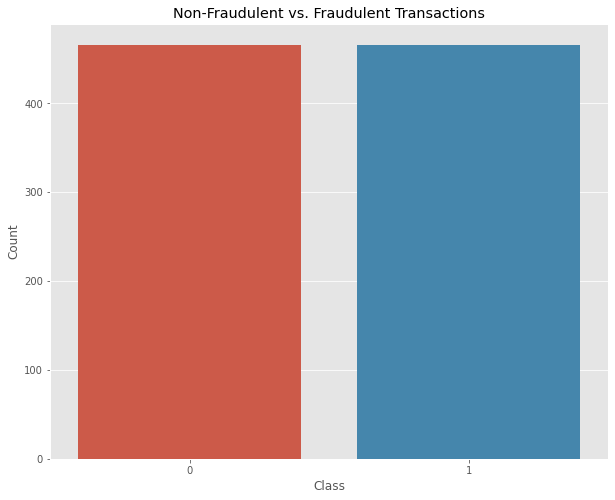

In [ ]:
New_Counts = SUBSAMPLE.Class.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=New_Counts.index, y=New_Counts)
plt.title('Non-Fraudulent vs. Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')


In [ ]:
corelation = SUBSAMPLE.corr()
corelation = corelation[['Class']]
corelation

,Class
V1,-0.428746
V2,0.499481
V3,-0.563839
V4,0.713821
V5,-0.386737
V6,-0.416392
V7,-0.477423
V8,0.055210
V9,-0.572281
V10,-0.627058


In [ ]:
print("Negative corelations")
corelation[corelation.Class < -0.5]

Negative corelations


,Class
V3,-0.563839
V9,-0.572281
V10,-0.627058
V12,-0.682865
V14,-0.746207
V16,-0.598819
V17,-0.559501


In [ ]:
print("Positive corelations")
corelation[corelation.Class > 0.5]

Positive corelations


,Class
V4,0.713821
V11,0.689424
Class,1.000000


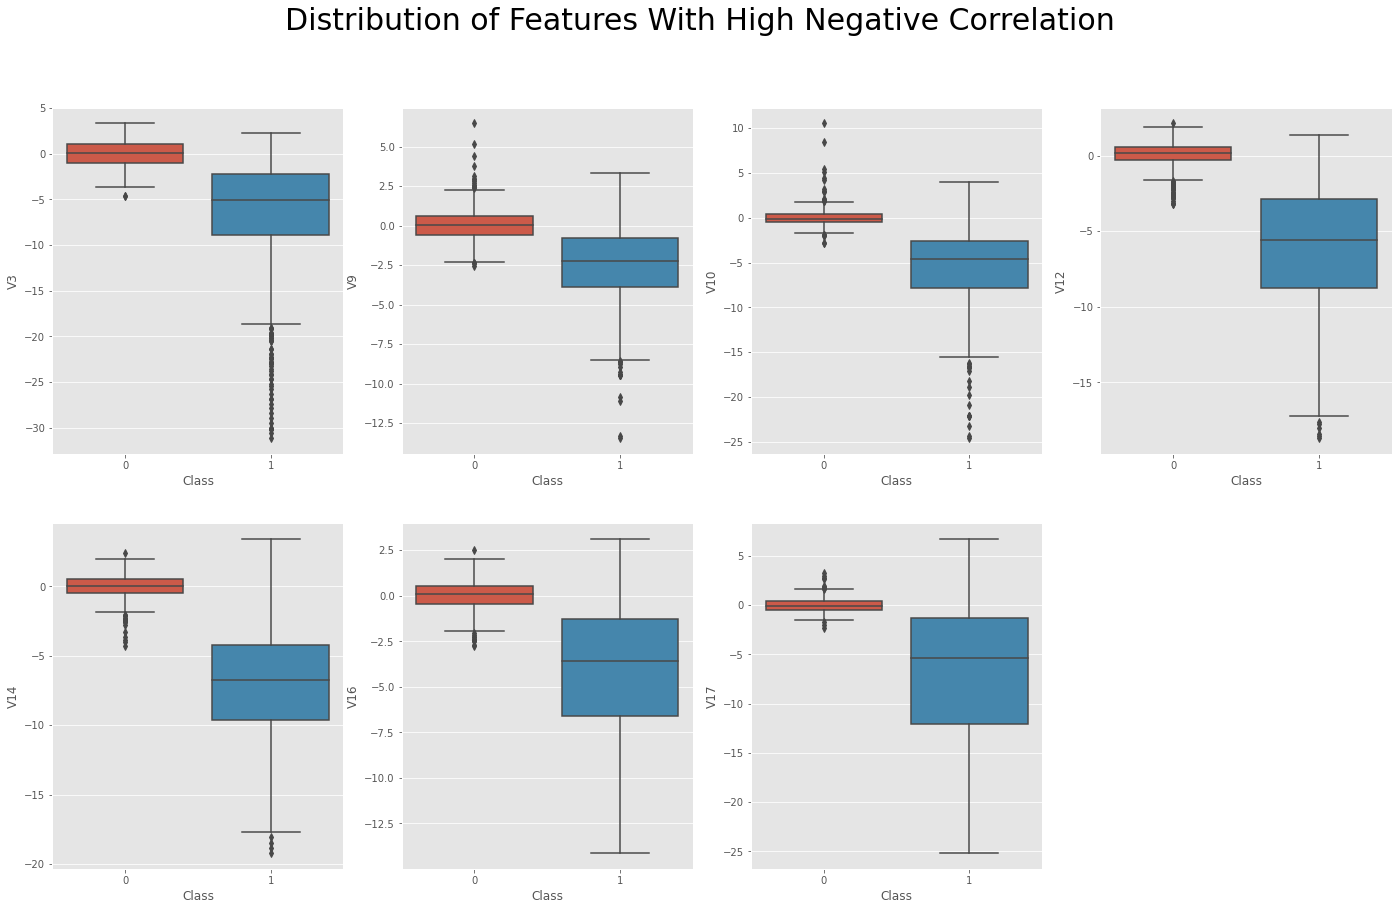

In [ ]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(24,14))

f.suptitle('Distribution of Features With High Negative Correlation', size=30)
sns.boxplot(x="Class", y="V3", data=SUBSAMPLE, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=SUBSAMPLE, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=SUBSAMPLE, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=SUBSAMPLE, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=SUBSAMPLE, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=SUBSAMPLE, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=SUBSAMPLE, ax=axes[1,2])
f.delaxes(axes[1,3])

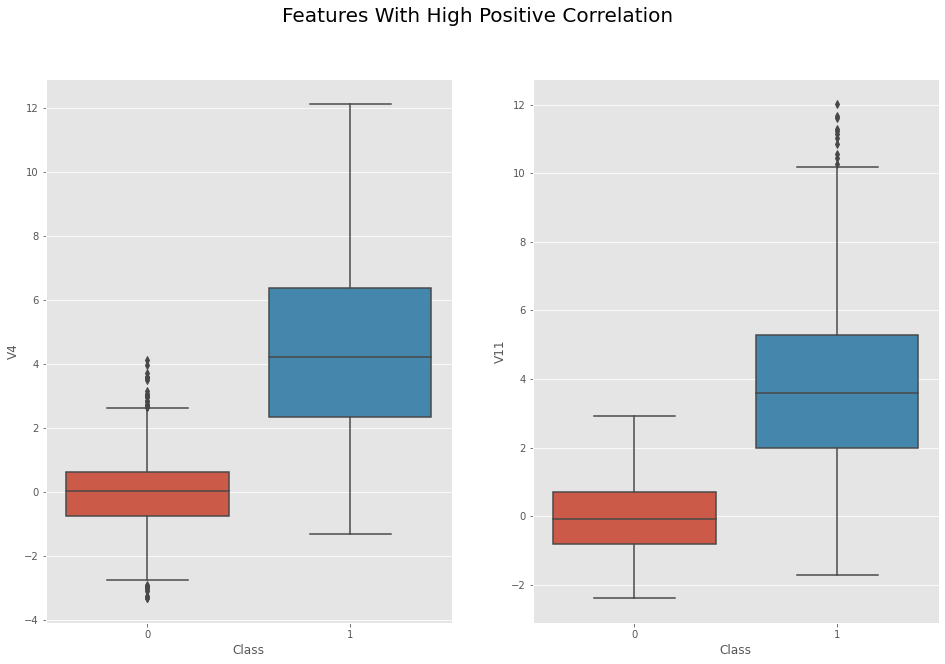

In [ ]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,10))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=SUBSAMPLE, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=SUBSAMPLE, ax=axes[1])

In [ ]:
Quantile1 = SUBSAMPLE.quantile(0.25)
Quantile3 = SUBSAMPLE.quantile(0.75)
InterQ = Quantile3 - Quantile1

data2 = SUBSAMPLE[~((SUBSAMPLE < (Quantile1 - 2.5 * InterQ)) |(SUBSAMPLE > (Quantile3 + 2.5 * InterQ))).any(axis=1)]

In [ ]:
AFTER = len(data2)
BEFORE = len(SUBSAMPLE)
Difference = len(SUBSAMPLE) - len(data2)
print('The data size is reduced from {} transactions by {} transactions to {} transactions.'.format(BEFORE, Difference, AFTER))

The data size is reduced from 932 transactions by 280 transactions to 652 transactions.


**Dimensionality Reduction**

In [ ]:
from sklearn.manifold import TSNE

X = data2.drop('Class', axis=1)
y = data2['Class']

In [ ]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


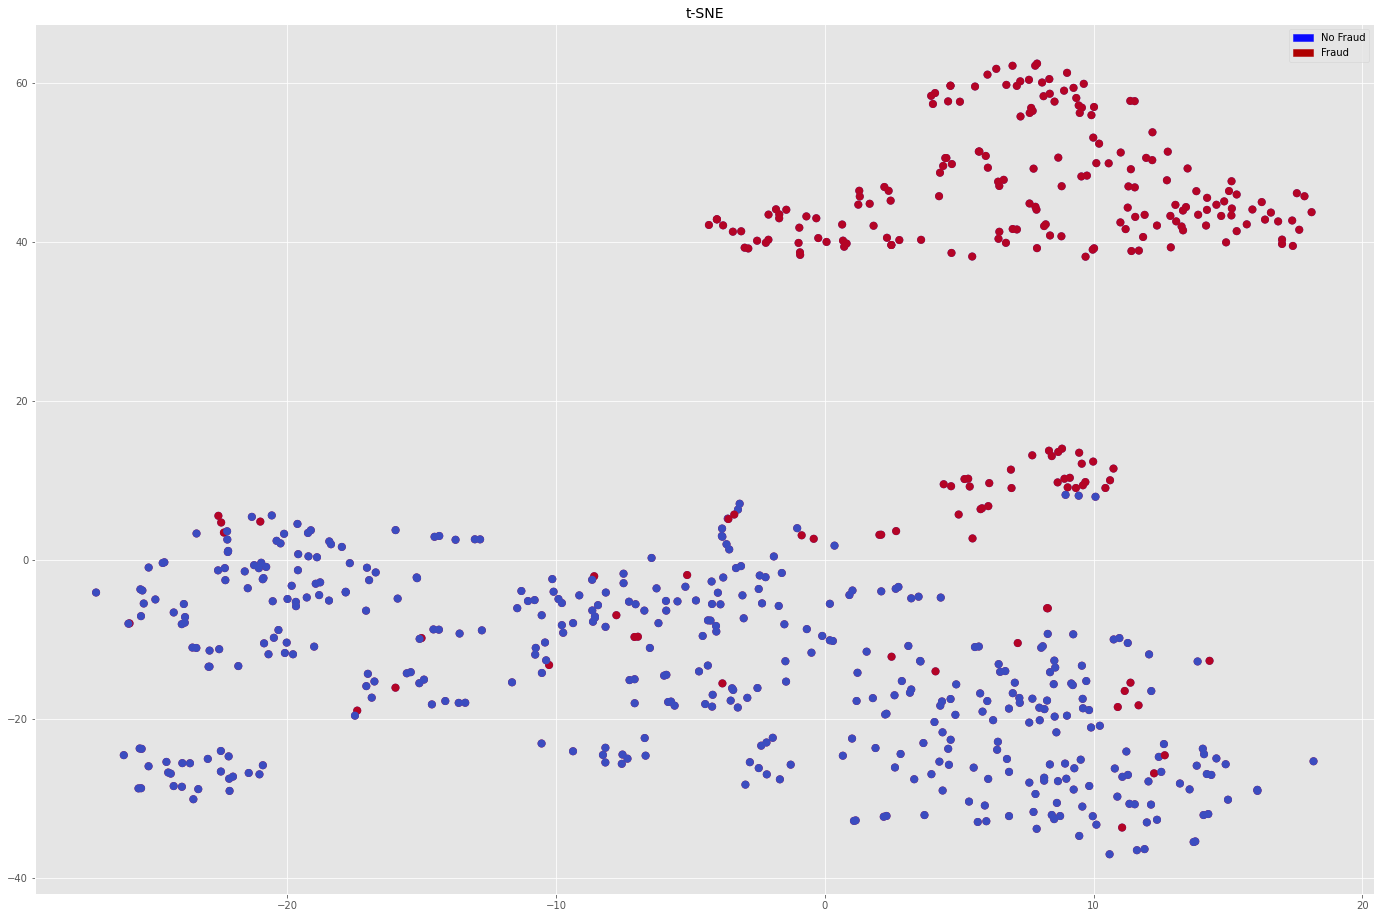

In [ ]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classification Algorithms**

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [ ]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (489, 30) (163, 30) 

Y_shapes:
 Y_train: Y_validation:
 (489,) (163,)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

**Linear Discriminant Analysis**

In [ ]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
LDA_pred = LDA.predict(X_validation)

Accuracy of LDA :

In [ ]:
print('Accuracy score of the Linear Discriminant Analysis is {}'.format(accuracy_score(y_validation, LDA_pred)))

Accuracy score of the Linear Discriminant Analysis is 0.9325153374233128


F1 Score :

In [ ]:
print('F1 score of the Linear Discriminant Analysis is {}'.format(f1_score(y_validation, LDA_pred)))

F1 score of the Linear Discriminant Analysis is 0.9009009009009009


Confusion Matrix :

In [ ]:
confusion_matrix(y_validation, LDA_pred, labels = [0, 1])

array([[102,   0],
       [ 11,  50]])

**Logistic Regression**

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_validation)

Accuracy of Logistic Regression :

In [ ]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_validation, LR_pred)))

Accuracy score of the Logistic Regression model is 0.9325153374233128


F1 Score :

In [ ]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_validation, LR_pred)))

F1 score of the Logistic Regression model is 0.9043478260869565


Confusion Matrix :

In [ ]:
confusion_matrix(y_validation, LR_pred, labels = [0, 1])

array([[100,   2],
       [  9,  52]])

**Decision Tree Algorithm**

In [ ]:
Decision_Tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
Decision_Tree.fit(X_train, y_train)
DT_pred = Decision_Tree.predict(X_validation)

Accuracy of Decision Tree :

In [ ]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_validation, DT_pred)))

Accuracy score of the Decision Tree model is 0.901840490797546


F1 Score :

In [ ]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_validation, DT_pred)))

F1 score of the Decision Tree model is 0.8666666666666666


Confusion Matrix :

In [ ]:
confusion_matrix(y_validation, DT_pred, labels = [0, 1])

array([[95,  7],
       [ 9, 52]])

**K-Nearest Neighbors**

In [ ]:
N = 5
KNN = KNeighborsClassifier(n_neighbors = N)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_validation)

Accuracy of KNN :

In [ ]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_validation, KNN_pred)))

Accuracy score of the K-Nearest Neighbors model is 0.9325153374233128


F1 Score :

In [ ]:
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_validation, KNN_pred)))

F1 score of the K-Nearest Neighbors model is 0.9026548672566372


Confusion Matrix :

In [ ]:
confusion_matrix(y_validation, KNN_pred, labels = [0, 1])

array([[101,   1],
       [ 10,  51]])

**Support Vector Machines**

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
SVM_pred = svm.predict(X_validation)

Accuracy of SVM :

In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_validation, SVM_pred)))

Accuracy score of the Support Vector Machines model is 0.9325153374233128


F1 Score :

In [ ]:
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_validation, SVM_pred)))

F1 score of the Support Vector Machines model is 0.9043478260869565


Confusion Matrix :

In [ ]:
confusion_matrix(y_validation, SVM_pred, labels = [0, 1])

array([[100,   2],
       [  9,  52]])

**XGBoost**

In [ ]:
XGB = XGBClassifier(max_depth = 4)
XGB.fit(X_train, y_train)
XGB_pred = XGB.predict(X_validation)

Accuracy of XGBoost :

In [ ]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_validation, XGB_pred)))

Accuracy score of the XGBoost model is 0.9386503067484663


F1 Score :

In [ ]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_validation, XGB_pred)))

F1 score of the XGBoost model is 0.9137931034482758


Confusion Matrix :

In [ ]:
confusion_matrix(y_validation, XGB_pred, labels = [0, 1])

array([[100,   2],
       [  8,  53]])